In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [3]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [4]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

0                    104
Steven Spielberg      26
Woody Allen           22
Martin Scorsese       20
Clint Eastwood        20
Ridley Scott          17
Tim Burton            16
Steven Soderbergh     16
Spike Lee             16
Renny Harlin          15
Oliver Stone          14
Name: director_name, dtype: int64


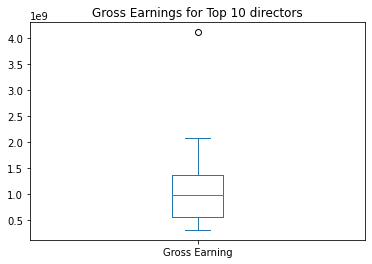

In [17]:
#to count the frequency of the directors because it means they have directed the movie
director_count = data['director_name'].value_counts()[:11]
print(director_count)

#to get the gross total of all the movies of the top 10 directors (with most movies directed)
Spielberg = data[data['director_name'] == "Steven Spielberg"]['gross'].sum()
Allen = data[data['director_name'] == "Woody Allen"]['gross'].sum()
Scorsese = data[data['director_name'] == "Martin Scorsese"]['gross'].sum()
Eastwood = data[data['director_name'] == "Clint Eastwood"]['gross'].sum()
Scott = data[data['director_name'] == "Ridley Scott"]['gross'].sum()
Burton = data[data['director_name'] == "Tim Burton"]['gross'].sum()
Soderbergh = data[data['director_name'] == "Steven Soderbergh"]['gross'].sum()
Lee = data[data['director_name'] == "Spike Lee"]['gross'].sum()
Harlin = data[data['director_name'] == "Renny Harlin"]['gross'].sum()
Stone = data[data['director_name'] == "Oliver Stone"]['gross'].sum()

#to make the table needed to make a boxplot
table = pd.DataFrame({'Director': ['Spielberg', 'Allen', 'Scorsese', 'Eastwood', 'Scott','Burton','Soderbergh','Lee','Harlin','Stone'],
                     'Gross Earning': [Spielberg, Allen, Scorsese, Eastwood, Scott, Burton, Soderbergh, Lee, Harlin, Stone],})

#to make the boxplot for the gross earnings of the top 10 directors
table['Gross Earning'].plot(kind='box', title='Gross Earnings for Top 10 directors')
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

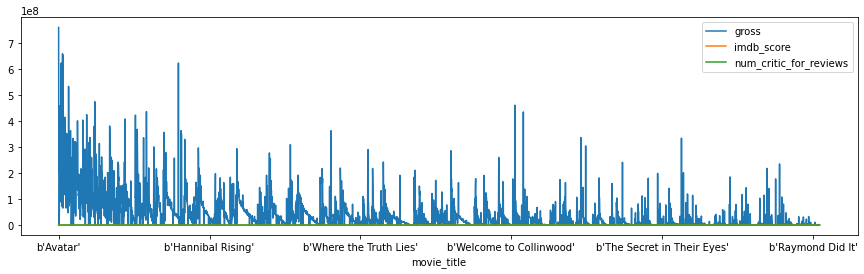

In [9]:
data.plot(x="movie_title", y=["gross", "imdb_score","num_critic_for_reviews"],figsize=(15, 4))
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [19]:
sales = data["gross"] - data["budget"]
#to make another column
data["sales"] = sales
data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0


## Which directors garnered the most total sales?

In [18]:
directors_most_sales = data.sort_values(by="sales", ascending=False)["director_name"][:10].tolist()
directors_most_sales

['James Cameron',
 'Colin Trevorrow',
 'James Cameron',
 'George Lucas',
 'Steven Spielberg',
 'Joss Whedon',
 'Joss Whedon',
 'Roger Allers',
 'George Lucas',
 'Christopher Nolan']

## Plot sales and average likes as a scatterplot. Fit it with a line.

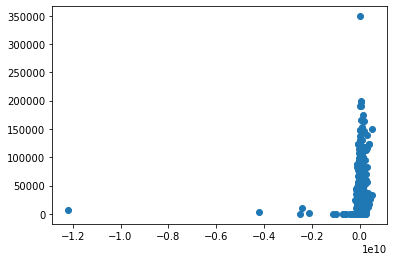

In [23]:
plt.scatter(data["sales"], data["movie_facebook_likes"])
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

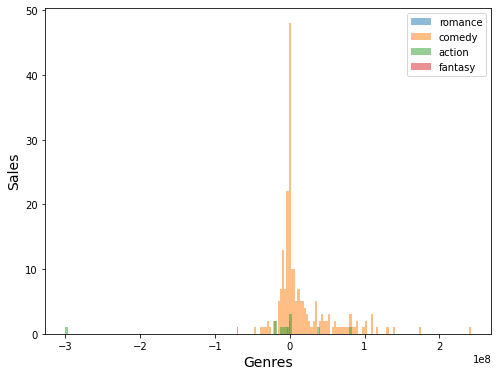

In [22]:
#to get the sales for each genre
romance = data[data['genres'] == "Romance"]['sales']
comedy = data[data['genres'] == "Comedy"]['sales']
action = data[data['genres'] == "Action"]['sales']
fantasy = data[data['genres'] == "Fantasy"]['sales']

#to plot them all in the same histogram
plt.figure(figsize=(8,6))
plt.hist(romance, bins=100, alpha=0.5, label="romance")
plt.hist(comedy, bins=100, alpha=0.5, label="comedy")
plt.hist(action, bins=100, alpha=0.5, label="action")
plt.hist(fantasy, bins=100, alpha=0.5, label="fantasy")
plt.xlabel("Genres", size=14)
plt.ylabel("Sales", size=14)
plt.legend(loc='upper right')
plt.show()

#Conclusion: Comedy is the most profitable genre

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

## Copying the whole dataframe

In [14]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [15]:
#normalize each column
x_num_critic_for_reviews = (df['num_critic_for_reviews'] - df['num_critic_for_reviews'].min()) / (df['num_critic_for_reviews'].max() - df['num_critic_for_reviews'].min())
print(x_num_critic_for_reviews)
x_duration = (df['duration'] - df['duration'].min()) / (df['duration'].max() - df['duration'].min())
print(x_duration)
x_director_facebook_likes = (df['director_facebook_likes'] - df['director_facebook_likes'].min()) / (df['director_facebook_likes'].max() - df['director_facebook_likes'].min())
print(x_director_facebook_likes)
x_actor_3_facebook_likes = (df['actor_3_facebook_likes'] - df['actor_3_facebook_likes'].min()) / (df['actor_3_facebook_likes'].max() - df['actor_3_facebook_likes'].min())
print(x_actor_3_facebook_likes)
x_actor_1_facebook_likes = (df['actor_1_facebook_likes'] - df['actor_1_facebook_likes'].min()) / (df['actor_1_facebook_likes'].max() - df['actor_1_facebook_likes'].min())
print(x_actor_1_facebook_likes)
x_gross = (df['gross'] - df['gross'].min()) / (df['gross'].max() - df['gross'].min())
print(x_gross)
x_num_voted_users = (df['num_voted_users'] - df['num_voted_users'].min()) / (df['num_voted_users'].max() - df['num_voted_users'].min())
print(x_num_voted_users)
x_cast_total_facebook_likes = (df['cast_total_facebook_likes'] - df['cast_total_facebook_likes'].min()) / (df['cast_total_facebook_likes'].max() - df['cast_total_facebook_likes'].min())
print(x_cast_total_facebook_likes)
x_facenumber_in_poster = (df['facenumber_in_poster'] - df['facenumber_in_poster'].min()) / (df['facenumber_in_poster'].max() - df['facenumber_in_poster'].min())
print(x_facenumber_in_poster)
x_num_user_for_reviews = (df['num_user_for_reviews'] - df['num_user_for_reviews'].min()) / (df['num_user_for_reviews'].max() - df['num_user_for_reviews'].min())
print(x_num_user_for_reviews)
x_budget = (df['budget'] - df['budget'].min()) / (df['budget'].max() - df['budget'].min())
print(x_budget)
x_title_year = (df['title_year'] - df['title_year'].min()) / (df['title_year'].max() - df['title_year'].min())
print(x_title_year)
x_actor_2_facebook_likes = (df['actor_2_facebook_likes'] - df['actor_2_facebook_likes'].min()) / (df['actor_2_facebook_likes'].max() - df['actor_2_facebook_likes'].min())
print(x_actor_2_facebook_likes)
x_imdb_score = (df['imdb_score'] - df['imdb_score'].min()) / (df['imdb_score'].max() - df['imdb_score'].min())
print(x_imdb_score)
x_aspect_ratio = (df['aspect_ratio'] - df['aspect_ratio'].min()) / (df['aspect_ratio'].max() - df['aspect_ratio'].min())
print(x_aspect_ratio)
x_movie_facebook_likes = (df['movie_facebook_likes'] - df['movie_facebook_likes'].min()) / (df['movie_facebook_likes'].max() - df['movie_facebook_likes'].min())
print(x_movie_facebook_likes)
x_sales = (df['sales'] - df['sales'].min()) / (df['sales'].max() - df['sales'].min())
print(x_sales)


0       0.889299
1       0.371464
2       0.740467
3       1.000000
4       0.000000
          ...   
5039    0.052891
5040    0.015990
5041    0.017220
5042    0.052891
5043    0.000000
Name: num_critic_for_reviews, Length: 5044, dtype: float64
0       0.941799
1       0.894180
2       0.783069
3       0.867725
4       0.000000
          ...   
5039    0.227513
5040    0.402116
5041    0.529101
5042    0.476190
5043    0.000000
Name: duration, Length: 5044, dtype: float64
0       0.000000
1       0.024478
2       0.000000
3       0.956522
4       0.005696
          ...   
5039    0.000000
5040    0.000000
5041    0.000000
5042    0.000696
5043    0.000000
Name: director_facebook_likes, Length: 5044, dtype: float64
0       0.037174
1       0.043478
2       0.007000
3       1.000000
4       0.000000
          ...   
5039    0.013870
5040    0.000000
5041    0.021261
5042    0.000696
5043    0.000000
Name: actor_3_facebook_likes, Length: 5044, dtype: float64
0       0.001563
1       0.06